<a href="https://colab.research.google.com/github/LGreenII/CS4410MachineLearning/blob/main/LevonGreenCS4410Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import seaborn as sns
%matplotlib inline

In [3]:
diabetes = load_diabetes()

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
diabetes.data.shape

(442, 10)

In [6]:
diabetes.target.shape

(442,)

In [7]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [10]:
pd.set_option('precision',4)
pd.set_option('max_columns', 9)
pd.set_option('display.width', None)

In [11]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [22]:
diabetes_df['Diabetes'] = pd.Series(diabetes.target)

In [23]:
diabetes_df.head()

,age,sex,bmi,bp,...,s5,s6,Age,Diabetes
0,0.0381,0.0507,151.0,0.0219,...,0.0199,-0.0176,151.0,151.0
1,-0.0019,-0.0446,75.0,-0.0263,...,-0.0683,-0.0922,75.0,75.0
2,0.0853,0.0507,141.0,-0.0057,...,0.0029,-0.0259,141.0,141.0
3,-0.0891,-0.0446,206.0,-0.0367,...,0.0227,-0.0094,206.0,206.0
4,0.0054,-0.0446,135.0,0.0219,...,-0.0320,-0.0466,135.0,135.0


In [24]:
diabetes_df.describe()

,age,sex,bmi,bp,...,s5,s6,Age,Diabetes
count,4.4200e+02,4.4200e+02,442.0000,4.4200e+02,...,4.4200e+02,4.4200e+02,442.0000,442.0000
mean,-3.6396e-16,1.3099e-16,152.1335,1.2898e-16,...,-3.8481e-16,-3.3985e-16,152.1335,152.1335
std,4.7619e-02,4.7619e-02,77.0930,4.7619e-02,...,4.7619e-02,4.7619e-02,77.0930,77.0930
min,-1.0723e-01,-4.4642e-02,25.0000,-1.1240e-01,...,-1.2610e-01,-1.3777e-01,25.0000,25.0000
25%,-3.7299e-02,-4.4642e-02,87.0000,-3.6656e-02,...,-3.3249e-02,-3.3179e-02,87.0000,87.0000
50%,5.3831e-03,-4.4642e-02,140.5000,-5.6706e-03,...,-1.9476e-03,-1.0777e-03,140.5000,140.5000
75%,3.8076e-02,5.0680e-02,211.5000,3.5644e-02,...,3.2433e-02,2.7917e-02,211.5000,211.5000
max,1.1073e-01,5.0680e-02,346.0000,1.3204e-01,...,1.3360e-01,1.3561e-01,346.0000,346.0000


In [25]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

In [26]:
sns.set(font_scale =2)

In [27]:
sns.set_style('whitegrid')

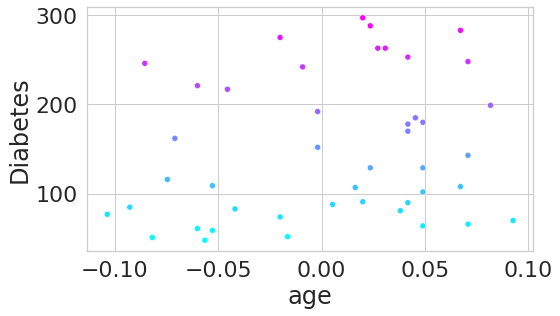

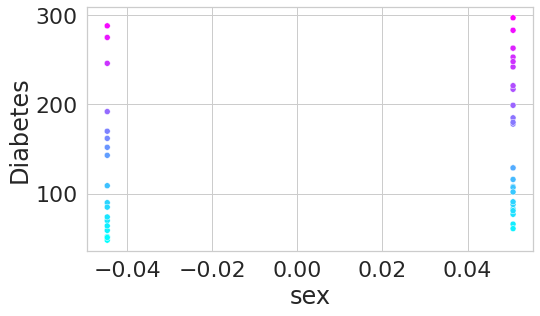

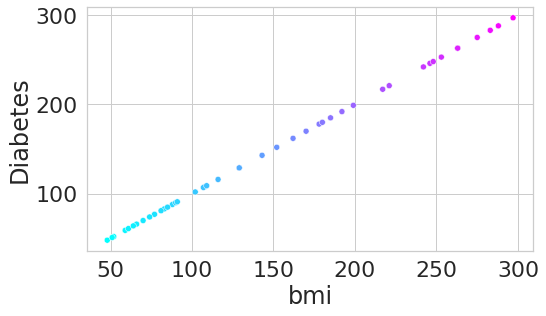

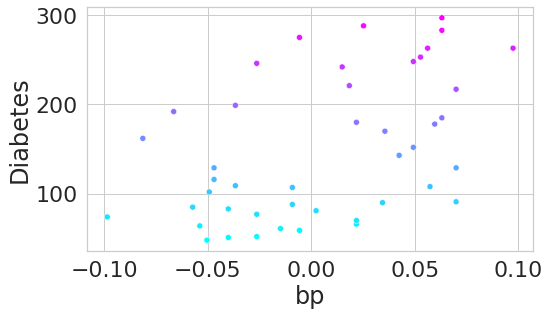

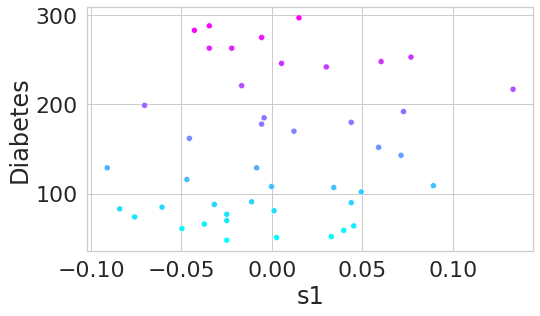

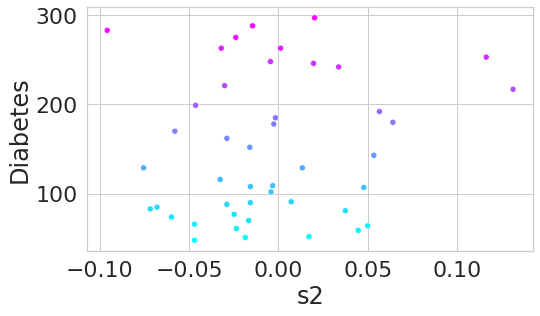

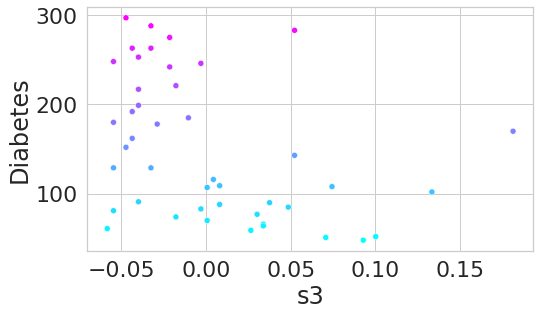

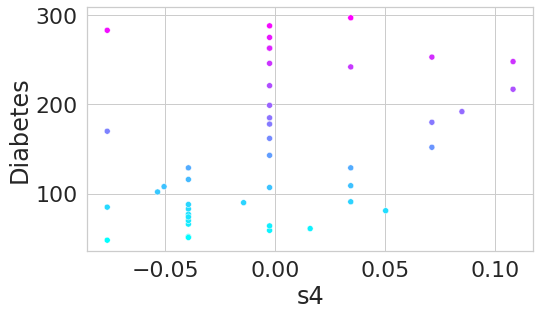

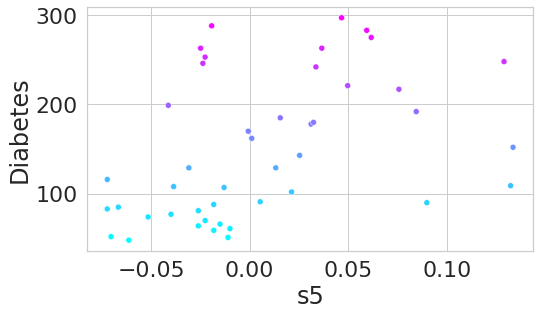

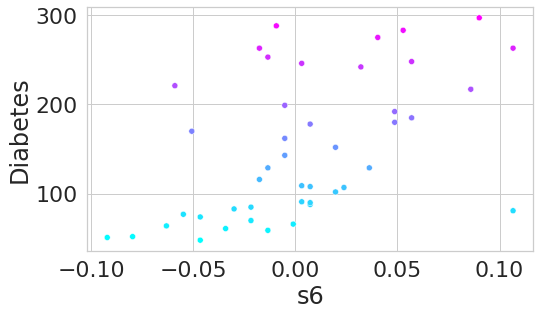

In [28]:
for feature in diabetes.feature_names:
  plt.figure(figsize=(8, 4.5))
  sns.scatterplot(data=sample_df, x=feature, y='Diabetes', hue='Diabetes', palette='cool', legend=False)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=11)

In [31]:
X_train.shape

(331, 10)

In [32]:
X_test.shape

(111, 10)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
linear_regression = LinearRegression()

In [35]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [36]:
for i, name in enumerate(diabetes.feature_names):
  print(f'{name:>10}: {linear_regression.coef_[i]}')

       age: 1.226290038395423e-13
       sex: -2.7400304247748863e-13
       bmi: 0.9999999999999994
        bp: 1.513784757267711e-14
        s1: -8.219128502795492e-13
        s2: 5.173973229022355e-13
        s3: 3.4025646883373284e-13
        s4: 2.1909318977109127e-13
        s5: 1.81602996529584e-13
        s6: 1.0989559956486872e-13


In [37]:
linear_regression.intercept_

8.526512829121202e-14

In [49]:
predicted = linear_regression.predict(X_test)
print(predicted)

[ 79.  55. 109. 178.  39. 321. 158. 132.  52. 201.  95. 303.  96.  60.
  72.  60.  59.  73. 257.  84.  57. 222. 102.  72. 292. 134. 220. 198.
 275. 156. 232. 142. 277. 263. 191.  68.  37. 167.  90. 311.  42.  53.
 186. 202. 191. 151. 129.  85. 308. 248. 107. 243.  94.  47. 104.  63.
 248.  60. 248.  61.  48.  71. 122. 200.  49. 118. 243.  52. 296. 192.
 202.  59. 197.  94. 183. 306.  93. 332. 297.  85. 152.  72. 233. 172.
  72. 233. 281. 281. 121. 174. 135. 127. 144. 288. 182.  77. 128.  55.
 268.  55. 262. 166.  66.  70. 259. 275. 173. 140. 245. 262.  42.]


In [50]:
expected = y_test
print(expected)

[ 79.  55. 109. 178.  39. 321. 158. 132.  52. 201.  95. 303.  96.  60.
  72.  60.  59.  73. 257.  84.  57. 222. 102.  72. 292. 134. 220. 198.
 275. 156. 232. 142. 277. 263. 191.  68.  37. 167.  90. 311.  42.  53.
 186. 202. 191. 151. 129.  85. 308. 248. 107. 243.  94.  47. 104.  63.
 248.  60. 248.  61.  48.  71. 122. 200.  49. 118. 243.  52. 296. 192.
 202.  59. 197.  94. 183. 306.  93. 332. 297.  85. 152.  72. 233. 172.
  72. 233. 281. 281. 121. 174. 135. 127. 144. 288. 182.  77. 128.  55.
 268.  55. 262. 166.  66.  70. 259. 275. 173. 140. 245. 262.  42.]


In [46]:
predicted[:20]

array([ 79.,  55., 109., 178.,  39., 321., 158., 132.,  52., 201.,  95.,
       303.,  96.,  60.,  72.,  60.,  59.,  73., 257.,  84.])

In [48]:
expected[:20]

array([ 79.,  55., 109., 178.,  39., 321., 158., 132.,  52., 201.,  95.,
       303.,  96.,  60.,  72.,  60.,  59.,  73., 257.,  84.])

In [47]:
df = pd.DataFrame()

In [43]:
df['Expected'] = pd.Series(expected)

In [44]:
df['Predicted'] = pd.Series(predicted)

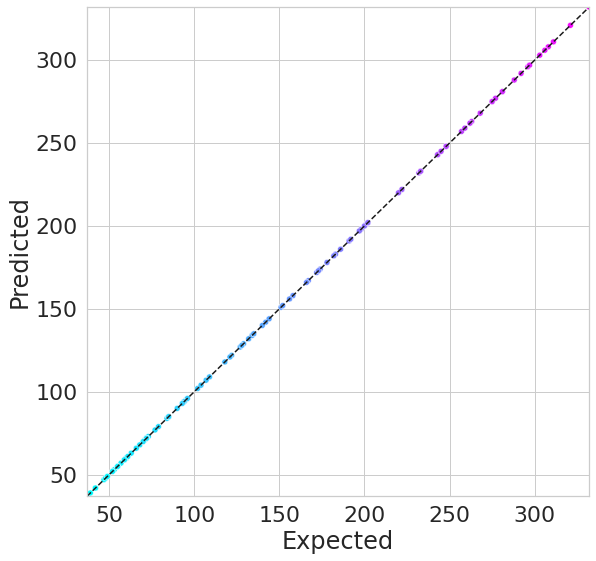

In [45]:
figure = plt.figure(figsize=(9,9))

axes = sns.scatterplot(data=df, x='Expected', y= 'Predicted', hue = 'Predicted', palette ='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

In [51]:
from sklearn import metrics

In [52]:
metrics.r2_score(expected, predicted)

1.0

In [53]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [54]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()

}

In [55]:
from sklearn.model_selection import KFold, cross_val_score

In [58]:
for estimators_name, estimators_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimators_object, X=diabetes.data, y=diabetes.target, cv=kfold, scoring='r2')
  print(f'{estimators_name:>16}: ' + f'mean of r2 scores ={scores.mean():.3f}')

LinearRegression: mean of r2 scores =1.000
      ElasticNet: mean of r2 scores =1.000
           Lasso: mean of r2 scores =1.000
           Ridge: mean of r2 scores =1.000
